In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
pip install umap-learn


     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 1.2MB 11.4MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=5bb46d31ac014a6e5d9e6efe5e501484b406e5e3cf99fbce724e55d19db43eec
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=e8f72e6515418a0d01fbb0741ec4cf7673a718e4185c2ee92bb621f41a90e95d
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
# Data Structures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
from os import listdir

from matplotlib.image import imread
import cv2
from tqdm import tqdm
from array import array
from PIL import Image, ImageOps
from sklearn import cluster, metrics
from PIL import Image, ImageOps
import time
from PIL import ImageFilter
import time, cv2

from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from umap import UMAP
from sklearn.manifold import TSNE

# Téléchargement des images

In [ ]:
#Download databases

flipkart= pd.read_csv('/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/flipkart_com-ecommerce_sample_1050.csv',sep=',')

In [ ]:
#create category
flipkart['category']=flipkart['product_category_tree'].str.split(
    pat=">>",expand=True)[0]
flipkart["category"] = flipkart["category"].str.replace('[', "")
flipkart["category"] = flipkart["category"].str.replace('"', "")
flipkart["category"] = flipkart["category"].str.replace(' ', "")

catg  = {'HomeFurnishing':'Home',
         'Watches':'Watches',
         'HomeDecor&FestiveNeeds':'Decor',
         'Watches':'Watches',
         'BabyCare':'Baby',
         'BeautyandPersonalCare':'Beauty',
         'Computers':'Computers',
         'Kitchen&Dining':'Kitchen'}
flipkart['category'] =[catg[i] for i in flipkart['category']]
cluster  = {'Baby':0,
           'Decor':1,
           'Computers':2,
           'Watches':3,
           'Kitchen':4,
           'Home':5,
           'Beauty':6}

y_true = flipkart['category'].map(cluster)
list_labels=flipkart["category"].unique()
path = "/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Images/"

In [ ]:
data_pic=flipkart[['image','category']]

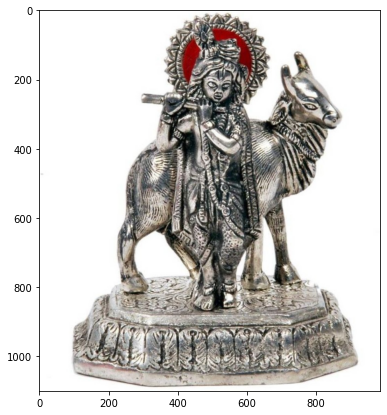

In [ ]:
from PIL import Image
im = Image.open(path+data_pic.image[230])
#im=resize_with_pad(test, 224, 224)

plt.figure(figsize=(7,7))
plt.imshow(im)


Home


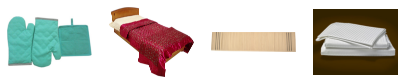

Baby


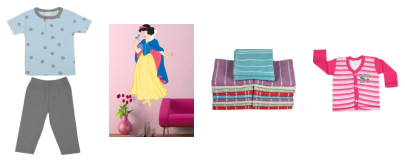

Watches


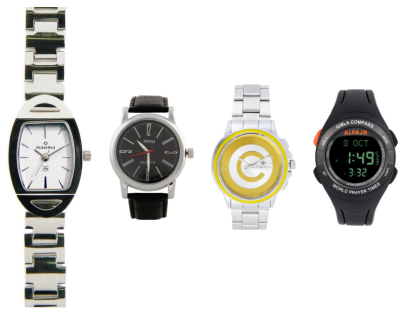

Decor


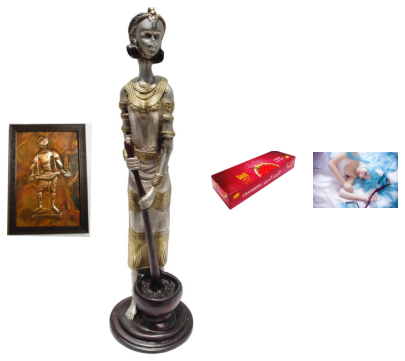

Kitchen


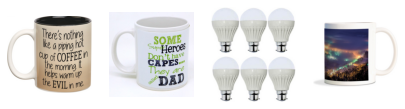

Beauty


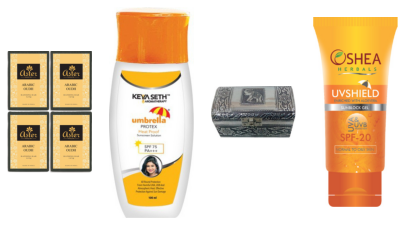

Computers


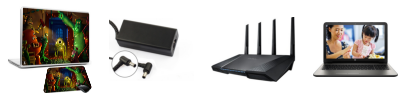

In [ ]:
list_labels=flipkart["category"].unique()
path = "/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Images/"
#plt.figure(figsize=(12,12))
for name in list_labels :
    plt.figure(figsize=(7,7))

    print(name)
    # print("-------")
    for i in range(4):
        plt.subplot(140 + 1 + i)
        for j in flipkart[flipkart["category"]==name].image.sample(3):
          filename = path + j
          image = imread(filename)
          plt.axis('off')
          plt.imshow(image)
    plt.show()

# Pré-traitement des images

In [ ]:
def resize_with_pad(im, target_width, target_height):
    '''
    Resize PIL image keeping ratio and using white background.
    '''
    target_ratio = target_height / target_width
    im_ratio = im.height / im.width
    if target_ratio > im_ratio:
        # It must be fixed by width
        resize_width = target_width
        resize_height = round(resize_width * im_ratio)
    else:
        # Fixed by height
        resize_height = target_height
        resize_width = round(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (round((target_width - resize_width) / 2), round((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [ ]:
from PIL import Image, ImageOps

def resizeimage(img, size):

  h, w = img.shape[:2]
  sh, sw = size

  # interpolation method
  if h > sh or w > sw: # shrinking image
      interp = cv2.INTER_AREA

  else: # stretching image
      interp = cv2.INTER_CUBIC

  # aspect ratio of image
  aspect = float(w)/h 
  saspect = float(sw)/sh

  if (saspect > aspect) or ((saspect == 1) and (aspect <= 1)):  # new horizontal image
      new_h = sh
      new_w = np.round(new_h * aspect).astype(int)
      pad_horz = float(sw - new_w) / 2
      pad_left, pad_right = np.floor(pad_horz).astype(int),np.ceil(pad_horz).astype(int)
      pad_top, pad_bot = 0, 0


  elif (saspect < aspect) or ((saspect == 1) and (aspect >= 1)):  # new vertical image
      new_w = sw
      new_h = np.round(float(new_w) / aspect).astype(int)
      pad_vert = float(sh - new_h) / 2
      pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
      pad_left, pad_right = 0, 0

  # scale and pad
  scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
  scaled_img = cv2.copyMakeBorder(scaled_img,pad_top, pad_bot,pad_left, 
                                  pad_right,borderType=cv2.BORDER_CONSTANT,value=255)#color white

  return scaled_img

In [ ]:
 #Convert to bovw

def process_image1(image_num):

        img_orig = Image.open(path+image_num) # download image
        img=img_orig.filter(ImageFilter.GaussianBlur(radius=3))#Gaussian blur filter.
        img = ImageOps.autocontrast(img) # Auto-contrast
        img = ImageOps.equalize(img) # Egalisation de l'histogramme
        img = img.filter(ImageFilter.BoxBlur(1)) # Lissage pour eliminer le bruit
        
        img = resize_with_pad(img, 224,224) # Resize en 224*224
        img=np.array(img)

        return img_orig, img

In [ ]:
 #Convert to bovw

 def img_process2(img_index): 
  image = cv2.imread(path+img_index,
                        cv2.IMREAD_GRAYSCALE) # convert in gray
  img = resizeimage(image, (224,224)) # Resize en 224*224
  img = cv2.equalizeHist(img)   # equalize image histogram

  img = cv2.adaptiveThreshold(img,
                              255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,#gaussian
                              cv2.THRESH_BINARY,
                              15,
                              3)
  # create a CLAHE object (Arguments are optional).
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
  img = clahe.apply(img)
  return image,img

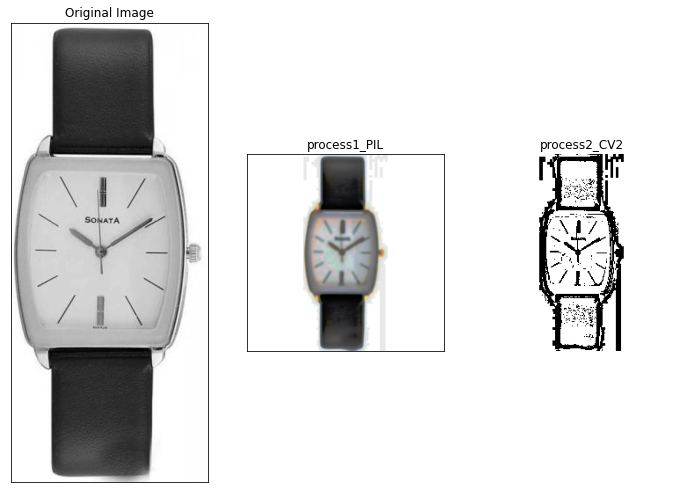

In [ ]:
index=580
img_orig,img=process_image1(data_pic.image[index])
img_orig,img_cv2=img_process2(data_pic.image[index])

titles = ['Original Image', 'process1_PIL','process2_CV2']
images = [img_orig, img,img_cv2]
plt.figure(figsize=(12,12))

for i in range(3):

    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.axis('off')
plt.show()


In [ ]:

def get_descriptors(model, process, nbr_model):
  des_list  = []
  descriptors=np.array([])
  for image_num in data_pic['image']:
        #préprocessing for image
        img_orig, img=process(image_num)
        # returns descriptors of an image
        kp, des = model.detectAndCompute(img, None)
        
        desc = [np.zeros((nbr_model,))] if des is None else des
        #desc = desc.astype ('float')

        if len(descriptors) == 0:
          descriptors = np.array(desc)
        else:
          descriptors = np.vstack((descriptors, desc))
        # Keep track of which image a descriptor belongs to
        des_list.append(desc)
  descriptors = np.asarray(descriptors) 
  return descriptors, des_list

In [ ]:
def BOVW(descriptors,des_list):
  k = int(round(np.sqrt(len(descriptors)),0))
  print("Nombre de clusters estimés : ", k)
  print("Création de",k, "clusters de descripteurs ...")

  # Clustering
  mini_birch = MiniBatchKMeans(n_clusters=k,init_size=3*k,
                                  random_state=40)
  mini_birch.fit(descriptors)

  # Calculate the histogram of features and represent them as vector
  #vq Assigns codes from a code book to observations.
  im_features = np.zeros((len(data_pic['image']), k), "float32")
  for i in range(len(data_pic['image'])):
      des = des_list[i]
      words=mini_birch.predict(des)
      for w in words:
          im_features[i][w] += 1
  return im_features

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from umap import UMAP
from sklearn.manifold import TSNE


def reduction(im_features):
  nmf = NMF(n_components=7)
  nmf_matrix = nmf.fit_transform(im_features)

  lda = LatentDirichletAllocation(7, learning_method='batch')
  lda_matrix = lda.fit_transform(im_features)

  umap= UMAP(n_components=3,init='random', random_state=0)
  proj_umap = umap.fit_transform(im_features)

  pca = PCA(n_components=0.99)
  feat_pca= pca.fit_transform(im_features)

  Tsne = TSNE(n_components=3, init='random', random_state=0)
  proj_tsne = Tsne.fit_transform(im_features)
  return nmf_matrix, lda_matrix, proj_umap, feat_pca, proj_tsne

In [ ]:

def evaluation(model, process, nbr_model):
  #get descriptor
  descriptors, des_list=get_descriptors(model, process, nbr_model)
  #bag of visual word
  im_features=BOVW(descriptors,des_list)
  #reduction of dimension
  nmf_matrix, lda_matrix, proj_umap, feat_pca, proj_tsne=reduction(im_features)
  return im_features, nmf_matrix, lda_matrix, proj_umap, feat_pca, proj_tsne



In [ ]:
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,PowerTransformer

def ARI_labels(feats,y_true):
  #Applying standardisation on training feature
  feature_std= StandardScaler().fit_transform(feats)
  cls = cluster.KMeans(n_clusters=7,
                      algorithm ='auto',
                      init ='random',
                      max_iter= 100,
                      n_init=5,
                      random_state=40)
  km_mat=cls.fit_transform(feature_std)
  labels=cls.labels_
  ari=metrics.adjusted_rand_score(y_true, labels)
  return labels, ari,km_mat

## Stratégie 1

Home


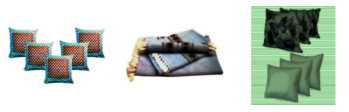

Baby


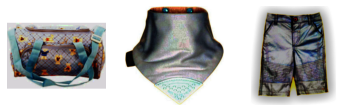

Watches


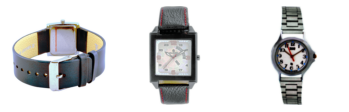

Decor


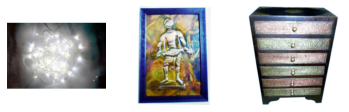

Kitchen


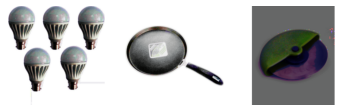

Beauty


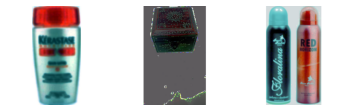

Computers


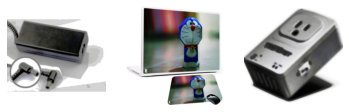

In [ ]:
for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        for j in flipkart[flipkart["category"]==name].image.sample(3):

          img,cl1=process_image1(j)
          plt.axis('off')
          plt.imshow(cl1,'gray')       
    plt.show()

In [ ]:
path = "/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Images/"

orb = cv2.ORB_create(200)

In [ ]:
# Perform k-means clustering and vector quantization
from sklearn.cluster import  Birch ,MiniBatchKMeans
from scipy.cluster.vq import kmeans, vq

temps1=time.time()
# # Perform k-means clustering and vector quantization
im_features, nmf_matrix,lda_matrix, proj_umap,feat_pca, proj_tsne=evaluation(orb, process_image1, 32)
duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Nombre de clusters estimés :  419
Création de 419 clusters de descripteurs ...
temps de traitement kmeans :           680.29 secondes


In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 419)
Dimensions dataset après réduction PCA :  (1050, 383)


In [ ]:
data_pic['cluster_nmf']=pd.DataFrame(nmf_matrix).idxmax(axis = 1)
data_pic['cluster_lda']=pd.DataFrame(lda_matrix).idxmax(axis = 1)
ari_nmf=metrics.adjusted_rand_score(y_true, data_pic['cluster_nmf'])
ari_lda=metrics.adjusted_rand_score(y_true, data_pic['cluster_lda'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
matrix=[im_features,nmf_matrix,lda_matrix,proj_umap,feat_pca,proj_tsne]
ari_list=[]
for mat in matrix:
  labels, ari,km_mat=ARI_labels(mat,y_true)
  ari_list.append(ari)
ari_list.append(ari_nmf)
ari_list.append(ari_lda)

In [ ]:
df_ari=pd.DataFrame([ari_list]
                    ,columns=['cluster_km','cluster_nmf_km',
                    'cluster_lda_km','cluster_umap_km',
                    'cluster_pca_km','cluster_tsne_km',
                    'cluster_nmf','cluster_lda'],
                    index=['ARI_SCORE'])

In [ ]:
df_ari

cluster_km  cluster_nmf_km  cluster_lda_km  cluster_umap_km  \
ARI_SCORE    0.018703        0.010163        0.015584         0.051574   

           cluster_pca_km  cluster_tsne_km  cluster_nmf  cluster_lda  
ARI_SCORE       -0.000953         0.009131        0.012     0.018197

Text(0, 0.5, 'ARI Score')

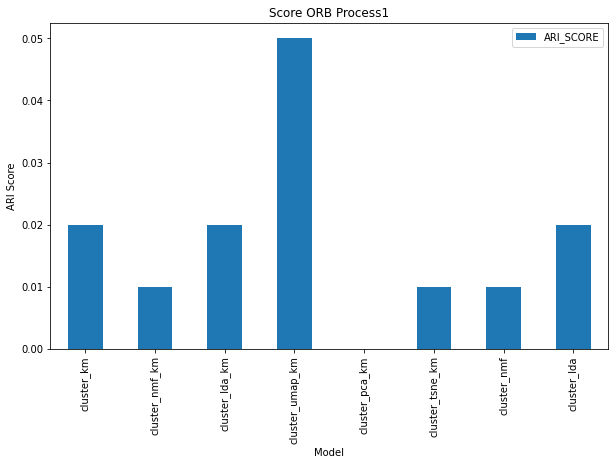

In [ ]:
df_ari.T.round(2).plot(kind="bar",figsize=(10,6))
plt.title("Score ORB Process1")
plt.xlabel("Model")
plt.ylabel("ARI Score")

In [ ]:
data_pic['cluster_nmf'].value_counts()

4    305
5    245
0    197
6    150
1     81
2     38
3     34
Name: cluster_nmf, dtype: int64

In [ ]:
# Visualize with : ACP, TSNE, Isomap ,UMAP,MDS
#We first use PCA , TSNE, Isomap ,UMAP,MDS to reduce the dataset to two dimensions by setting n_components=2.
# Then we'll visualize the features by plotting the two components against each other
from umap import UMAP
from sklearn.manifold import TSNE, Isomap, MDS
def projection(im_features,feat_pca,proj_tsne,proj_umap,label_):
    #color
    cmap = plt.get_cmap('jet', 20)
    cmap.set_under('gray')
    fig, ax = plt.subplots(2, 2, figsize=(20,20))
    tsne_ = TSNE(n_components = 2,
             random_state=42,
             init='pca',# reduce to  PCA components, before t-SNE
             ).fit_transform(im_features)
    ax[0,0].scatter(tsne_[:, 0], tsne_[:, 1], c=label_, cmap=cmap)
    ax[0,0].set_xlabel('TSNE_2', fontsize=16)
    ax[0,0].set_ylabel('TSNE_1', fontsize=16)
    ax[0,0].set_title('tSNE with 7 clusters', fontsize=24)
    ax[0,0].grid(True)

    #We first use PCA to reduce the dataset to two dimensions by setting n_components=2.
    # Then we'll visualize the dataset by plotting the two components against each other

    ax[0,1].scatter(feat_pca[:, 0], feat_pca[:, 1], c=label_, cmap=cmap)
    ax[0,1].set_xlabel('PCA_1', fontsize=16)
    ax[0,1].set_ylabel('PCA_2', fontsize=16)
    ax[0,1].set_title('PCA with 7 clusters', fontsize=24)
    ax[0,1].grid(True)

    ##We first use MDS to reduce the dataset to two dimensions by setting n_components=2.
    # Then we'll visualize the dataset by plotting the two components against each other
    mds = MDS(n_components = 2,
              random_state=42).fit_transform(im_features)
    ax[1,0].scatter(mds[:, 0], mds[:, 1], c=label_,  cmap=cmap)
    ax[1,0].set_xlabel('MDS_1', fontsize=16)
    ax[1,0].set_ylabel('MDS_2', fontsize=16)
    ax[1,0].set_title('MDS with 7 clusters', fontsize=24)
    ax[1,0].grid(True)

    #Uniform Manifold Approximation and Projection (UMAP)
    #The UMAP hyperparameter that need to be tuned to get good results:n_neighbors

    ax[1,1].scatter(proj_umap[:, 0], proj_umap[:, 1], c=label_, cmap=cmap)
    ax[1,1].set_xlabel('UMAP_1', fontsize=16)
    ax[1,1].set_ylabel('UMAP_2', fontsize=16)
    ax[1,1].set_title('UMAP with 7 clusters', fontsize=24)
    ax[1,1].grid(True)
    plt.legend(label_) 
    plt.tight_layout()
    plt.show()

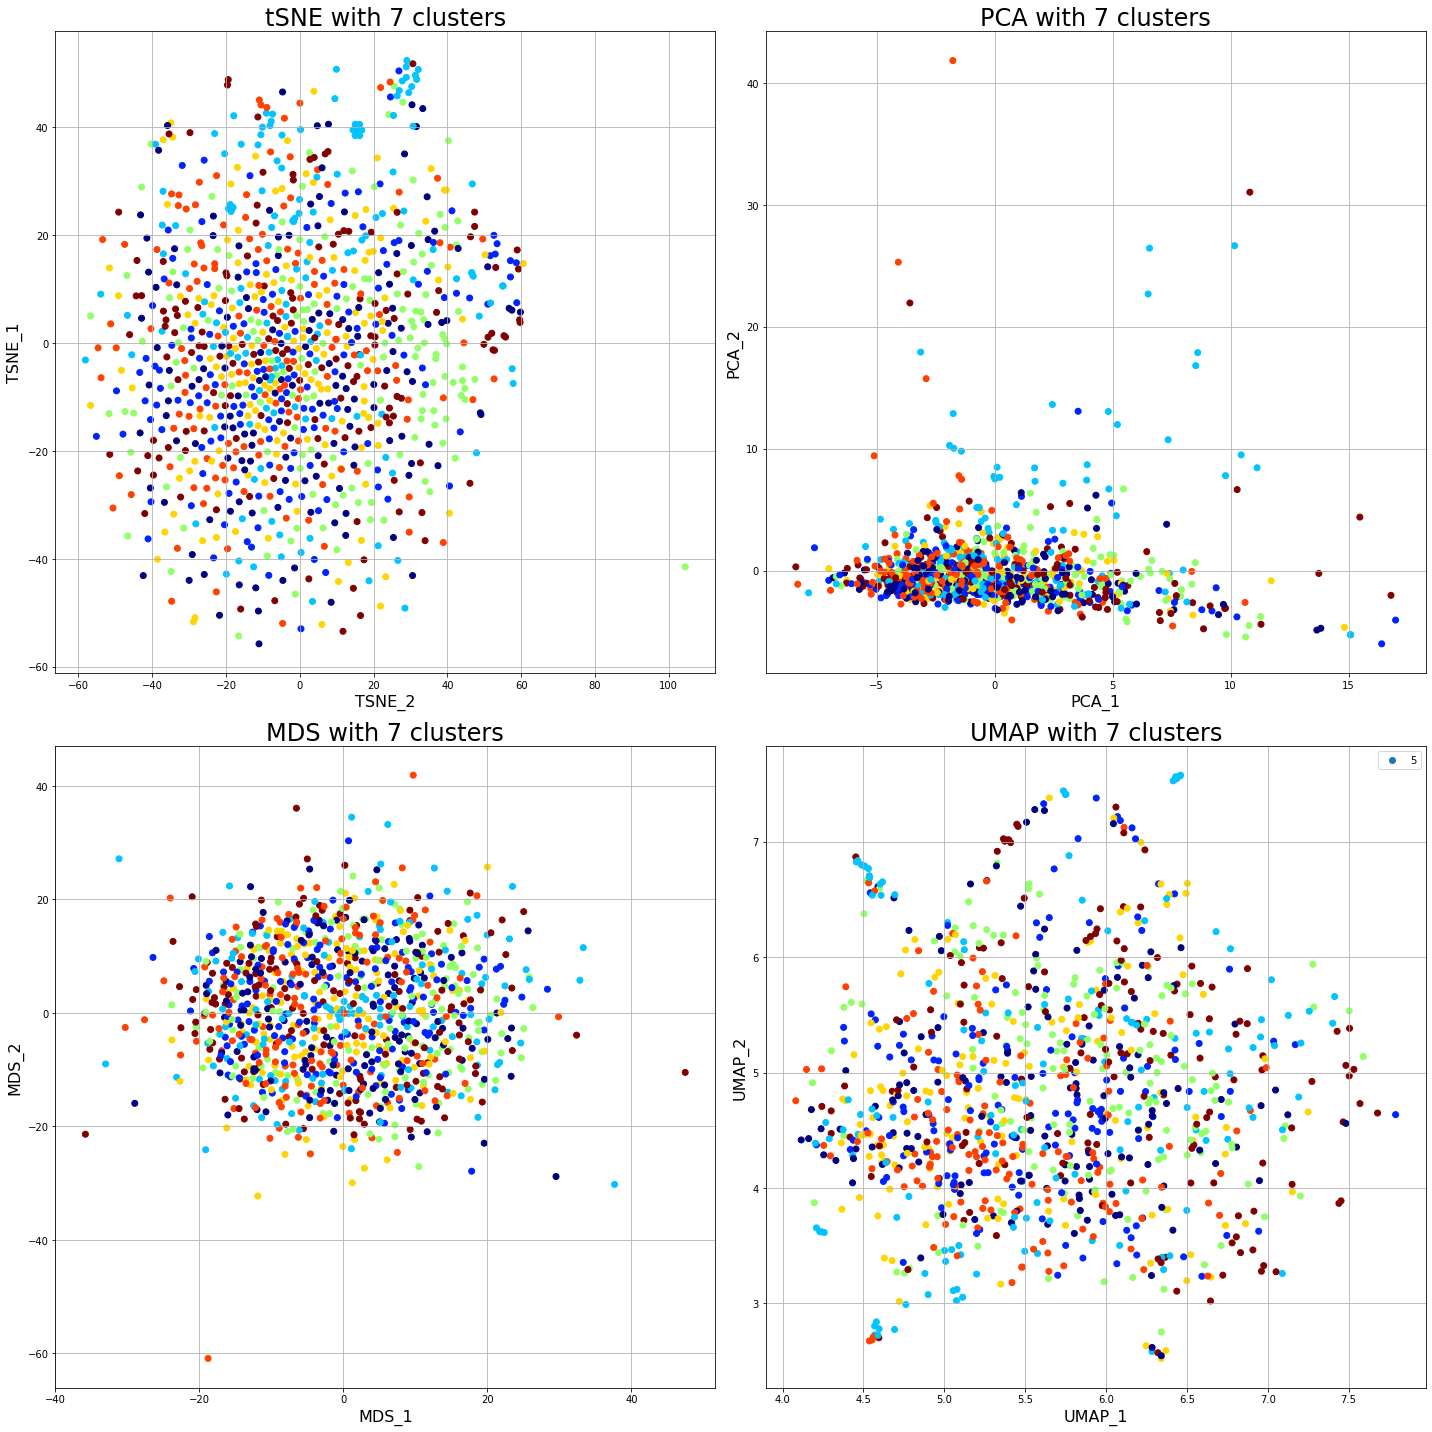

In [ ]:
projection(im_features,feat_pca,proj_tsne,proj_umap,y_true)

## Stratégie 2

Home


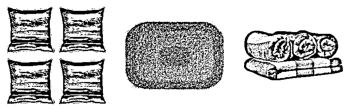

Baby


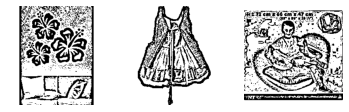

Watches


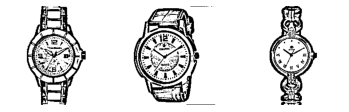

Decor


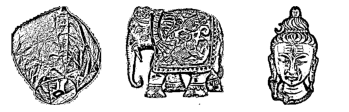

Kitchen


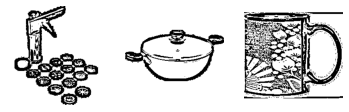

Beauty


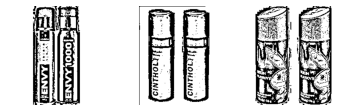

Computers


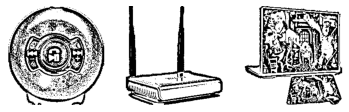

In [ ]:
for name in list_labels :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        for j in flipkart[flipkart["category"]==name].image.sample(3):

          img,cl1=img_process2(j)
          plt.axis('off')
          plt.imshow(cl1,'gray')       
    plt.show()

In [ ]:
temps1=time.time()
# # Perform k-means clustering and vector quantization
im_features2, nmf_matrix2,lda_matrix2, proj_umap2,feat_pca2, proj_tsne2=evaluation(orb, img_process2, 32)
duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  436
Création de 436 clusters de descripteurs ...
temps de traitement kmeans :           150.96 secondes


In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features2.shape)
print("Dimensions dataset après réduction PCA : ", feat_pca2.shape)

Dimensions dataset avant réduction PCA :  (1050, 436)
Dimensions dataset après réduction PCA :  (1050, 403)


In [ ]:
data_pic['cluster_nmf']=pd.DataFrame(nmf_matrix2).idxmax(axis = 1)
data_pic['cluster_lda']=pd.DataFrame(lda_matrix2).idxmax(axis = 1)
ari_nmf=metrics.adjusted_rand_score(y_true, data_pic['cluster_nmf'])
ari_lda=metrics.adjusted_rand_score(y_true, data_pic['cluster_lda'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
matrix=[im_features2,nmf_matrix2,lda_matrix2,proj_umap2,feat_pca2,proj_tsne2]
ari_list=[]
for mat in matrix:
  labels, ari,km_mat=ARI_labels(mat,y_true)
  ari_list.append(ari)
ari_list.append(ari_nmf)
ari_list.append(ari_lda)

In [ ]:
df_ari=pd.DataFrame([ari_list]
                    ,columns=['cluster_km','cluster_nmf_km',
                    'cluster_lda_km','cluster_umap_km',
                    'cluster_pca_km','cluster_tsne_km',
                    'cluster_nmf','cluster_lda'],
                    index=['ARI_SCORE_proces1'])

In [ ]:
df_ari

cluster_km  cluster_nmf_km  cluster_lda_km  \
ARI_SCORE_proces1    0.034106        0.027776        0.030098   

                   cluster_umap_km  cluster_pca_km  cluster_tsne_km  \
ARI_SCORE_proces1         0.024358       -0.001249         0.022298   

                   cluster_nmf  cluster_lda  
ARI_SCORE_proces1     0.026216      0.03304

Text(0, 0.5, 'ARI Score')

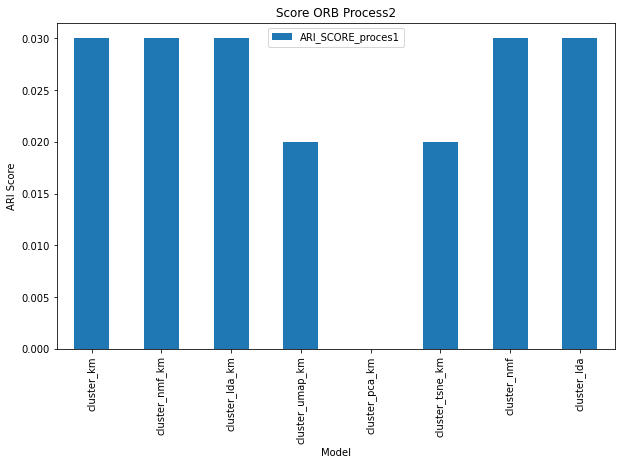

In [ ]:
df_ari.T.round(2).plot(kind="bar",figsize=(10,6))
plt.title("Score ORB Process2")
plt.xlabel("Model")
plt.ylabel("ARI Score")

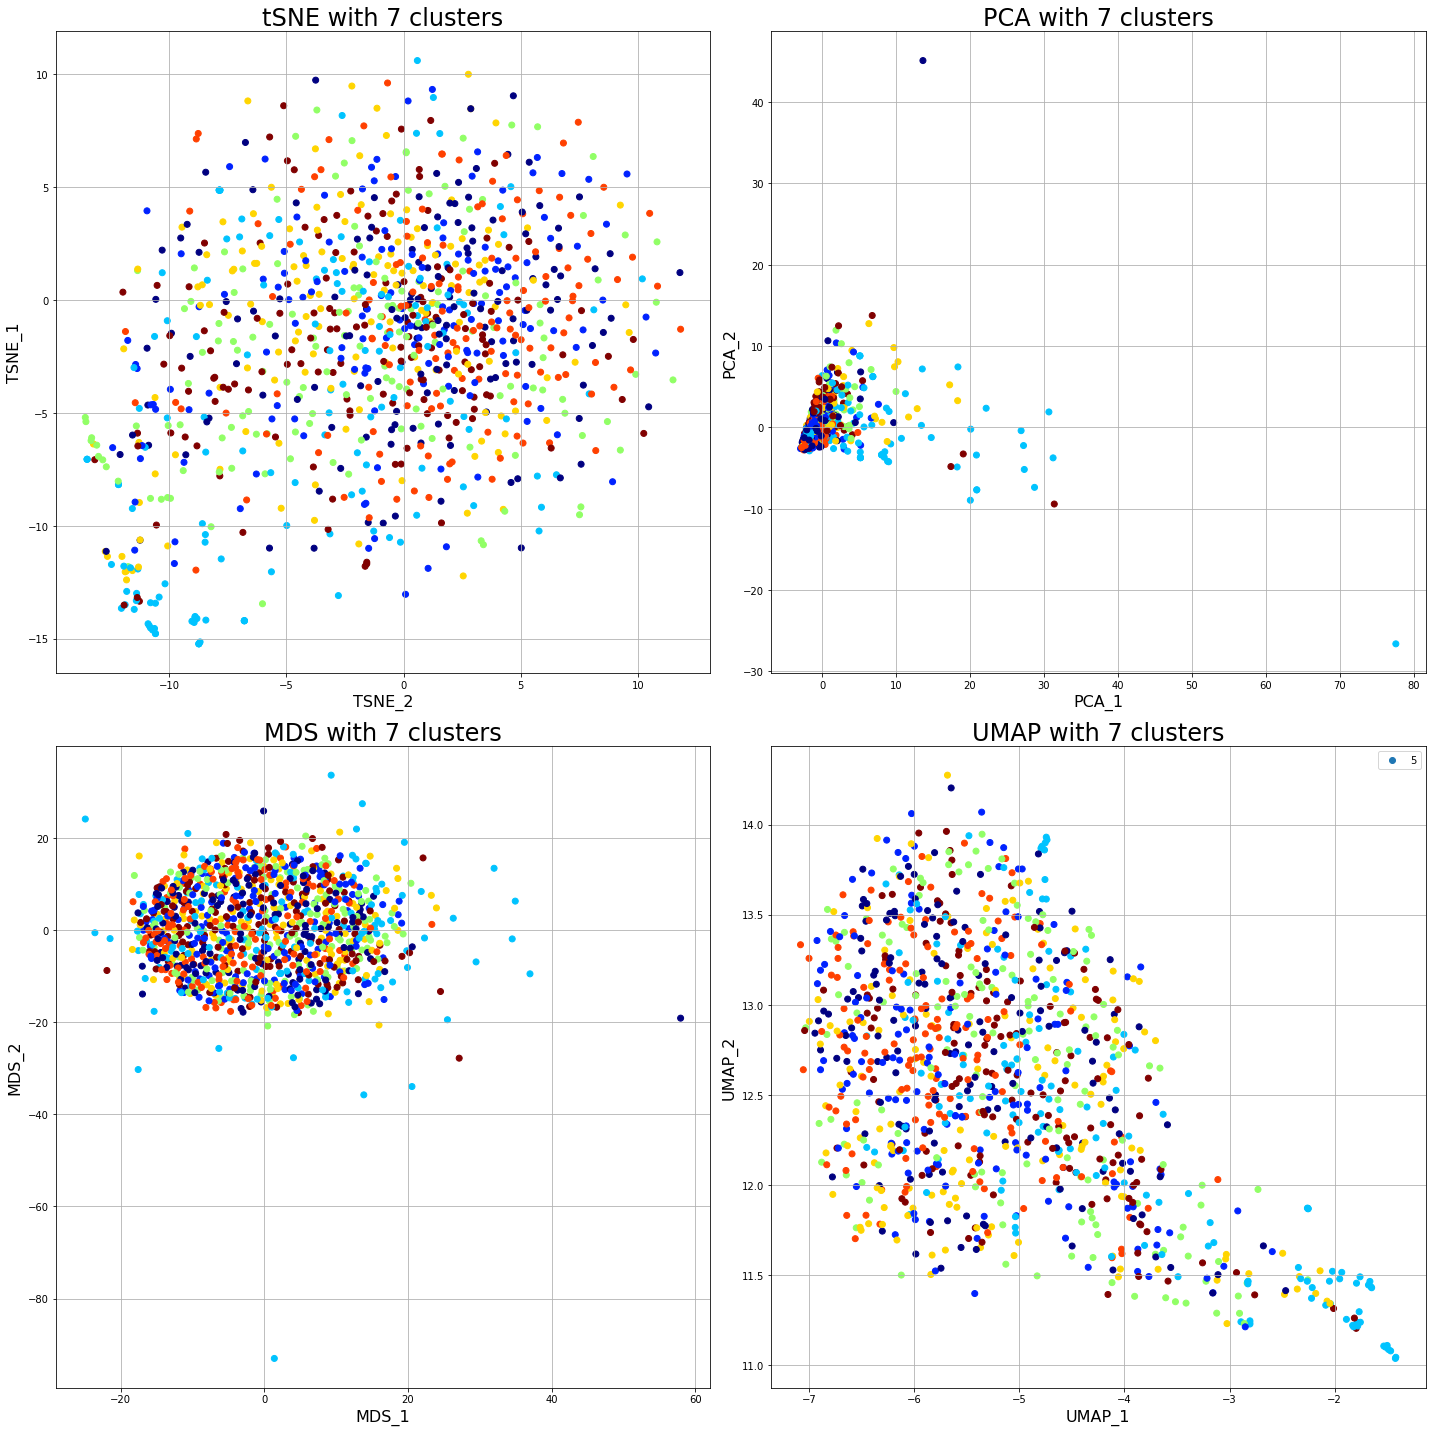

In [ ]:
projection(im_features2,feat_pca2,proj_tsne2,proj_umap2,y_true)

# Models for Transfer Learning

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
from pickle import dump
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import keras
from keras.preprocessing import image

import cv2
import os
import numpy as np
from keras.models import load_model, Model
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,AveragePooling2D
from keras.layers import Dense,Dropout,Activation,Flatten

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50 
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.nasnet import NASNetLarge
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.xception import Xception

from keras.applications.vgg16 import preprocess_input as prpc_vgg
from keras.applications.xception import preprocess_input as prpc_xce
from keras.applications.nasnet import preprocess_input as prpc_nasnet
from keras.applications.resnet50 import preprocess_input as prpc_resnet
from keras.applications.inception_resnet_v2 import preprocess_input as prpc_inc
from keras.applications.resnet_v2 import preprocess_input as prpc_restv2


from keras.models import Model


## Feature extraction 

In [ ]:
def get_features(model_name, data_preprocessor, input_size, data):
    '''
    1- Create a feature extractor to extract features from the data.
    2- Returns the extracted features and the feature extractor.
    '''
    #Prepare pipeline.
    input_layer = Input(input_size)
    preprocessor = Lambda(data_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)
    #Extract feature.
    feature_maps = feature_extractor.predict(data, batch_size=64, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [ ]:
# Function to Extract features from the images
from keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from keras.preprocessing import image

def image_extract_feature(direc,preprocess, model,h,w):

    features = [];

    # extract features from each photo
    for name in data_pic['image']:
        # load an image from file
        img = Image.open(path+name) # Lecture de l'image
        img = resize_with_pad(img, h,w) # Resize en 224*224
        # get features
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess(x)

        resnet_feature = model.predict(x)
        resnet_feature_np = np.array(resnet_feature)
        features.append(resnet_feature_np.flatten())
    features_np = np.array(features)
  
    return features

In [ ]:
# load the model
model_vgg16 = VGG16(include_top=False,
                    weights="imagenet",
                    input_shape=(224,224,3))
model_restnet_v2 = ResNet50V2(include_top=False,
                         weights="imagenet",
                         input_shape=(224,224,3),
                         input_tensor=None,
                         classes=1000,
                         classifier_activation='softmax')
model_restnet = ResNet50(include_top=False,
                         weights="imagenet",
                         input_shape=(224,224,3))
model_xception=Xception(include_top=True,
                        weights="imagenet",
                        input_shape=(299,299,3),
                        classifier_activation="softmax")
model_nasnet=NASNetLarge(input_shape=(331,331,3),
                         weights="imagenet",)
model_inception=InceptionResNetV2(include_top=True,
                                  weights="imagenet",
                                  classifier_activation="softmax")

In [ ]:
def ari_model(features):
  nmf_matrix,lda_matrix,proj_umap,feat_pca,proj_tsne=reduc(features)
  matrix=[nmf_matrix,
         lda_matrix,
          proj_umap,
          feat_pca,
          proj_tsne,
          features]
  ARI=[]
  for mat in matrix:
    kmeans = KMeans(n_clusters=7,
                algorithm= 'auto',
                init= 'k-means++',
                random_state=15,
                max_iter=100,
                n_init=10).fit(mat)
    labeels=kmeans.labels_
    ari=metrics.adjusted_rand_score(y_true, labeels)
    ARI.append(ari)
  return ARI

In [ ]:
def reduc(feature):
    nmf = NMF(n_components=7)
    nmf_matrix = nmf.fit_transform(feature)

    lda = LatentDirichletAllocation(7)
    lda_matrix = lda.fit_transform(feature)

    umap= UMAP(n_components=3,init='random')
    proj_umap = umap.fit_transform(feature)

    pca = PCA(n_components=0.99)
    feat_pca= pca.fit_transform(feature)

    Tsne = TSNE(n_components=3, init='random')
    proj_tsne = Tsne.fit_transform(feature)

    return nmf_matrix,lda_matrix,proj_umap,feat_pca,proj_tsne



**VGG16**

In [ ]:
features_vgg16=image_extract_feature(path,prpc_vgg, model_vgg16,224,224)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [ ]:
ARI_vgg=ari_model(features_vgg16)
ARI_vgg

**ResNet50**

In [ ]:
features_restnet50=image_extract_feature(path,prpc_resnet, model_restnet,224,224)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [ ]:
ARI_res=ari_model(features_restnet50)
ARI_res

[0.32564334220666513,
 0.29268061004002177,
 0.39331095887778666,
 0.2116047301005014,
 0.37588811144725615,
 0.38470206837871596]

**ResNet50V2**

In [ ]:
features_restnet_v2=image_extract_feature(path,prpc_restv2, model_restnet_v2,224,224)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [ ]:
ARI_rest_v2=ari_model(features_restnet_v2)
ARI_rest_v2

[0.2832482135310127,
 0.43093436329011137,
 0.22668994447537877,
 0.2855205362912026,
 0.2527350186515435,
 0.26981324251644234]

**Xception**

In [ ]:
features_xception=image_extract_feature(path,prpc_xce, model_xception,299,299)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [ ]:
ARI_xpec=ari_model(features_xception)
ARI_xpec

[0.0761376153261814,
 0.26527729740529393,
 0.20264949410177116,
 0.06515919520854782,
 0.3965680665218373,
 0.06626332213677627]

**InceptionResNetV2**

In [ ]:
features_inception=image_extract_feature(path,prpc_inc, model_inception,299,299)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [ ]:
ARI_incp=ari_model(features_inception)
ARI_incp

[0.08709227092534397,
 0.24613903227542844,
 0.2537237906190009,
 0.07310122463321511,
 0.2837005227459786,
 0.08765040550733576]

**NASNetLarge**

In [ ]:
features_nasne=image_extract_feature(path,prpc_nasnet, model_nasnet,331,331)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [ ]:
ARI_nasne=ari_model(features_nasne)
ARI_nasne

[0.11905665481047126,
 0.19763169043611079,
 0.24736052794965238,
 0.11769290076223277,
 0.2986156355672258,
 0.10896633739404965]

## Evaluation

In [ ]:
comp_ari=pd.DataFrame([ARI_vgg,
                     ARI_res,
                     ARI_rest_v2,
                     ARI_xpec,
                     ARI_incp,
                     ARI_nasne]
                    ,columns=['nmf_matrix',
                              'lda_matrix',
                              'proj_umap',
                              'feat_pca',
                              'proj_tsne',
                              'features'],
                    index=['VGG16',
                           'ResNet50',
                           'ResNet50_V2',
                           'Xception',
                           'InceptionResNetV2',
                           'NASNetLarge'])

In [ ]:
comp_ari.round(2)

nmf_matrix  lda_matrix  proj_umap  feat_pca  proj_tsne  \
VGG16                    0.20        0.35       0.27      0.17       0.26   
ResNet50                 0.33        0.29       0.39      0.21       0.38   
ResNet50_V2              0.28        0.43       0.23      0.29       0.25   
Xception                 0.08        0.27       0.20      0.07       0.40   
InceptionResNetV2        0.09        0.25       0.25      0.07       0.28   
NASNetLarge              0.12        0.20       0.25      0.12       0.30   

                   features  
VGG16                  0.17  
ResNet50               0.38  
ResNet50_V2            0.27  
Xception               0.07  
InceptionResNetV2      0.09  
NASNetLarge            0.11

Text(0, 0.5, 'ARI Score')

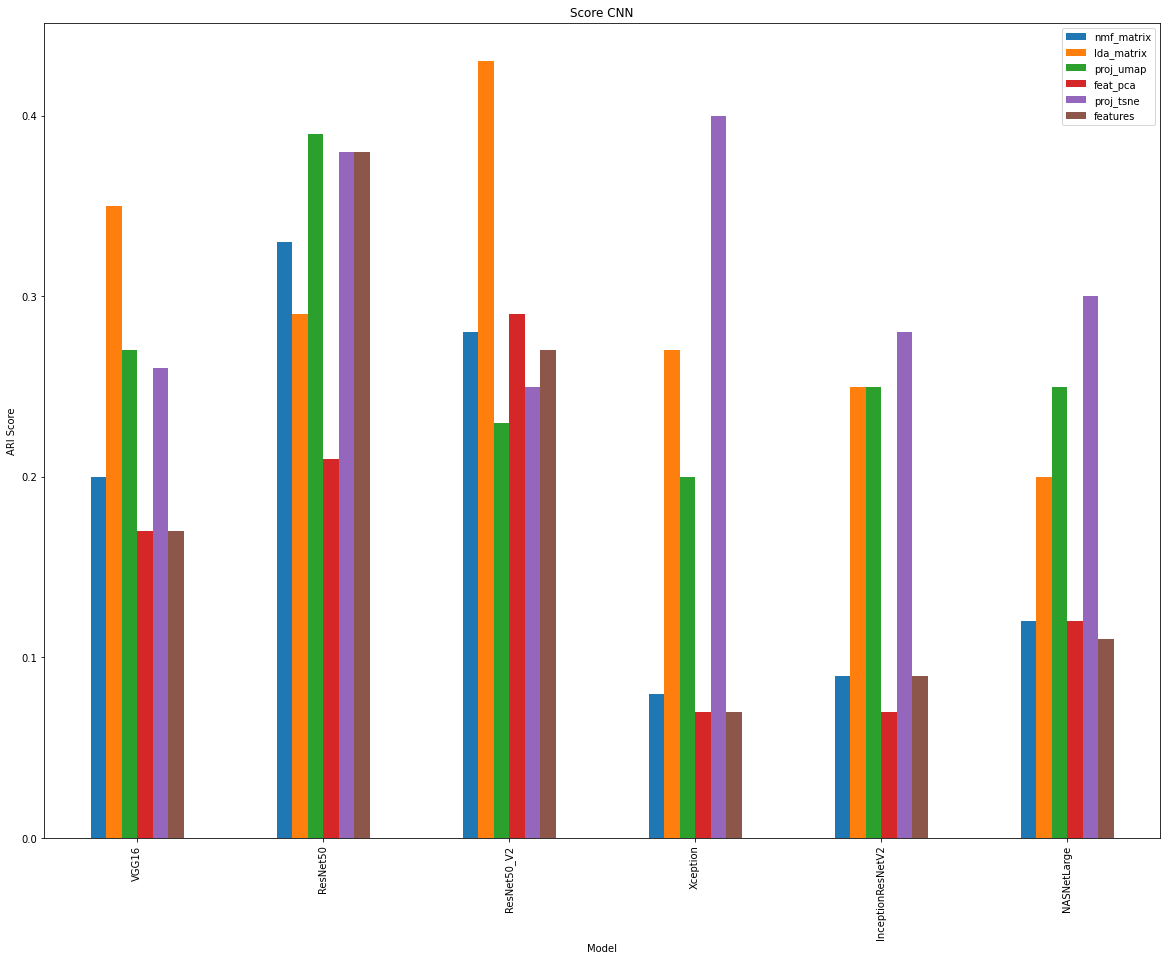

In [ ]:

comp_ari.round(2).plot(kind="bar",figsize=(20,15))
plt.title("Score CNN")
plt.xlabel("Model")
plt.ylabel("ARI Score")

## Analyse des clusters

In [ ]:
from sklearn.metrics import make_scorer,adjusted_rand_score
from sklearn.model_selection import GridSearchCV

#nombre de cluster
n_clusters=7

#initier le modèle kmeans avec les parametres defaut
km=KMeans(n_clusters=n_clusters)
#le score à optimiser
score=make_scorer(adjusted_rand_score)
#les hyperparametres à optimiser
parameters = {'init':('k-means++', 'random'),
              'max_iter':[50,100,120],#Nombre de fois où l'algorithme k-means sera exécuté avec différentes valeurs de centroïde. Les résultats finaux seront la meilleure sortie de n_init exécutions consécutives en termes d'inertie.
              'n_init':[5,10,15],#Nombre maximum d'itérations de l'algorithme k-means pour une seule exécution.
              'algorithm':['auto', 'full', 'elkan'],#Algorithme K-means à utiliser
              'random_state': [20,25,30,40,60,]}#Détermine la génération de nombres aléatoires pour l'initialisation du centre de gravité. Utilisez un int pour rendre le caractère aléatoire déterministe

#recherche sur gride
lda = LatentDirichletAllocation(7)
lda_matrix = lda.fit_transform(features_restnet50)
grid = GridSearchCV(km, parameters,scoring=score)
grid.fit(lda_matrix,y_true)
index_grid=grid.cv_results_['rank_test_score'].tolist().index(1)
print("ARI score mean :"+str(grid.cv_results_['mean_test_score'][index_grid]))
print("Best parameters: "+str(grid.best_params_))

ARI score mean :0.4255354704963802
Best parameters: {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 50, 'n_init': 5, 'random_state': 40}


In [ ]:
lda = LatentDirichletAllocation(7)
lda_matrix = lda.fit_transform(features_restnet_v2)
kmeans = KMeans(n_clusters=7,
                algorithm= 'auto',
                init= 'k-means++',
                random_state=15,
                max_iter=50,
                n_init=10).fit(lda_matrix)
labeels=kmeans.labels_


In [ ]:
round(metrics.adjusted_rand_score(y_true, labeels), 2)

0.43

In [ ]:

from sklearn.decomposition import SparsePCA
from umap import UMAP
from sklearn.manifold import TSNE


def plot_tsne_pca(matrix,title,labels):

# Dimensionality reduction using PCA,
     # reduce the tfidf matrix to just 2 features

    pca = PCA(n_components=2,
              random_state=5).fit_transform(matrix)
    tsne_pca = TSNE().fit_transform(PCA(n_components=3).fit_transform(matrix))
    tsne = TSNE(n_components=2,
              random_state=5).fit_transform(matrix)   
    #attaching the label to each 2D projection
    pca_data=np.vstack((pca.T,labels)).T
    pca_df=pd.DataFrame(pca_data,
                        columns=['pca-one','pca-two','category'])

    tsne_data=np.vstack((tsne.T,labels)).T
    tsne_df=pd.DataFrame(tsne_data,
                         columns=['tsne-one','tsne-two','category'])

    
    
    idx = np.random.choice(range(pca.shape[0]), 
                           size=500, replace=False)
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))


    sns.scatterplot(data=pca_df,
                    x="pca-one",
                    y="pca-two",
                    hue='category',
                    ax=ax[0])
    ax[0].set_title('PCA Cluster Plot'+' '+title)
    

    sns.scatterplot(data=tsne_df,
                    x="tsne-one",
                    y="tsne-two",
                    hue='category',
                    ax=ax[1])
    ax[1].set_title('TSNE Cluster Plot'+' '+title)
    



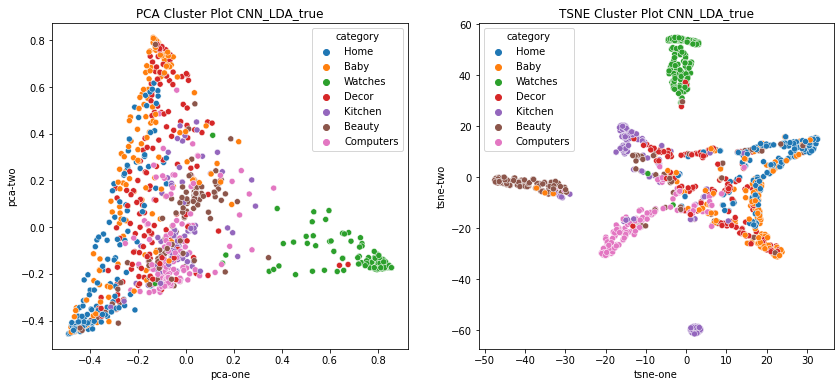

In [ ]:
plot_tsne_pca(lda_matrix,'CNN_LDA_true',data_pic['category']) 

In [ ]:
data_pic['cluster_lda']=labeels
metrics.confusion_matrix(y_true, data_pic['cluster_lda'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[  3,   0,  96,   3,   6,  42,   0],
       [  5,   2,  88,   0,  33,  22,   0],
       [122,   1,  18,   4,   3,   2,   0],
       [  0, 144,   1,   0,   5,   0,   0],
       [  9,   0,  10,   9,  88,   3,  31],
       [  1,   0,  32,   0,   1, 116,   0],
       [ 13,   0,   7,  94,  19,  17,   0]])

In [ ]:
np.argmax(metrics.confusion_matrix(y_true, data_pic['cluster_lda']), axis=0)

array([2, 3, 0, 6, 4, 5, 4])

In [ ]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat =metrics.confusion_matrix(y_true,y_pred)
    
    #corresp = np.argmax(conf_mat, axis=0)
    corresp = [2, 3, 0, 6, 1, 5, 4]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

labels_transform = conf_mat_transform(y_true, data_pic['cluster_lda'])
conf_mat = metrics.confusion_matrix(y_true, labels_transform)
print(conf_mat)

Correspondance des clusters :  [2, 3, 0, 6, 1, 5, 4]
[[ 96   6   3   0   0  42   3]
 [ 88  33   5   2   0  22   0]
 [ 18   3 122   1   0   2   4]
 [  1   5   0 144   0   0   0]
 [ 10  88   9   0  31   3   9]
 [ 32   1   1   0   0 116   0]
 [  7  19  13   0   0  17  94]]


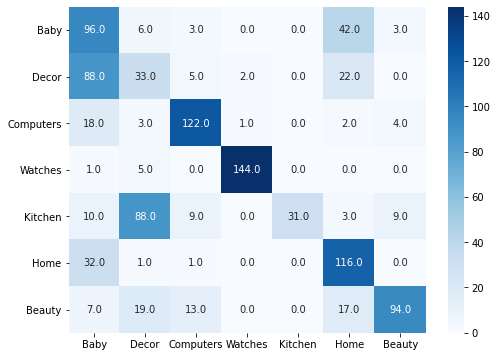

In [ ]:
list_labels=['Baby','Decor','Computers','Watches',
           'Kitchen','Home','Beauty']
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [label for label in list_labels])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, fmt='.1f', cmap="Blues")

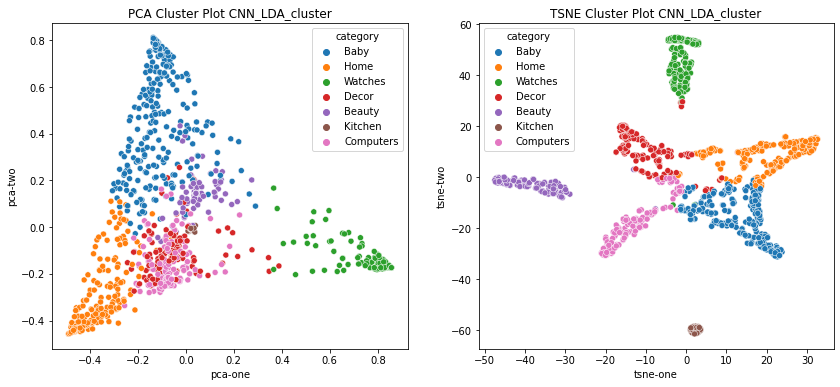

In [ ]:
cluster  = {0:'Baby',
            1:'Decor',
            2:'Computers',
            3:'Watches',
            4:'Kitchen',
            5:'Home',
            6:'Beauty'}

labels_transform = labels_transform.map(cluster)
plot_tsne_pca(lda_matrix,'CNN_LDA_cluster',labels_transform) 

In [ ]:

data_pic['cluster_lda']=labels_transform


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Baby


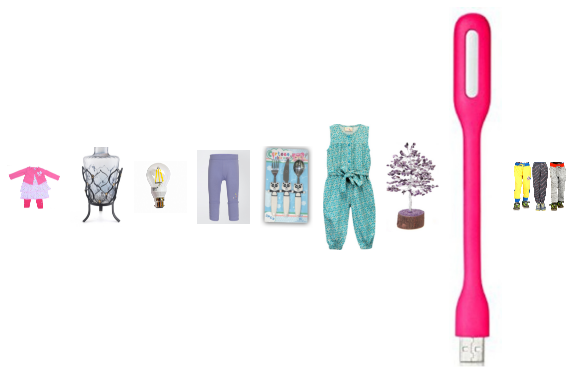

Home


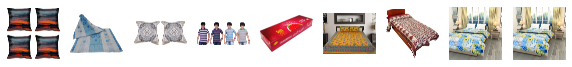

Watches


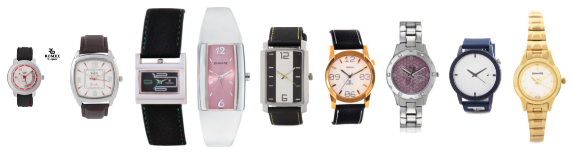

Decor


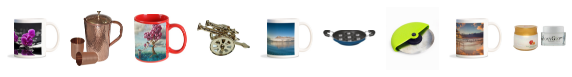

Beauty


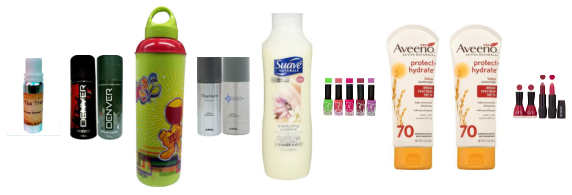

Kitchen


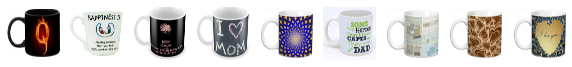

Computers


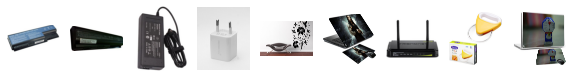

In [ ]:
list_labels=data_pic['cluster_lda'].unique()
path = "/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Images/"
#plt.figure(figsize=(12,12))
for name in list_labels :
    plt.figure(figsize=(10,10))

    print(name)
    # print("-------")
    for i in range(9):
        plt.subplot(190 + 1 + i)
        for j in data_pic[data_pic['cluster_lda']==name].image.sample(3):
          filename = path + j
          image = imread(filename)
          plt.axis('off')
          plt.imshow(image)
    plt.show()

# Test évaluation

In [ ]:
from PIL import Image
from random import *

path = "/content/drive/MyDrive/Fatma Aidi/Parcours OCR/Data/Images/"
def eval(index):
    im = Image.open(path+flipkart.image[index])
    print('Name:  ',flipkart['product_name'].iloc[index])
    print('categorie: ',data_pic['category'].iloc[index])

    print('cluster: ',data_pic.cluster_lda.iloc[index])

    plt.figure(figsize=(7,7))
    plt.imshow(im)

Name:   Intex Kids Inflatable Air Chair
categorie:  Baby
cluster:  Baby


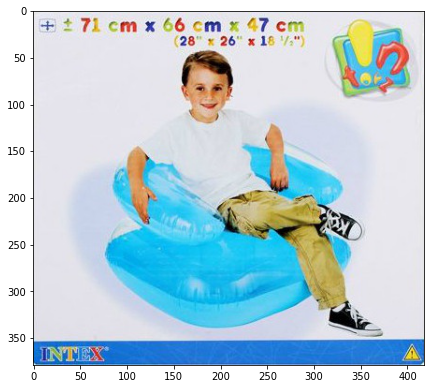

In [ ]:
eval(889)

Name:   Ajmal Titanium and Expedition Combo Set
categorie:  Beauty
cluster:  Beauty


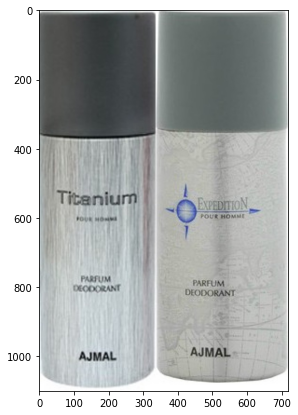

In [ ]:
eval(415)

Name:   Printland PMR1834 Ceramic Mug
categorie:  Kitchen
cluster:  Decor


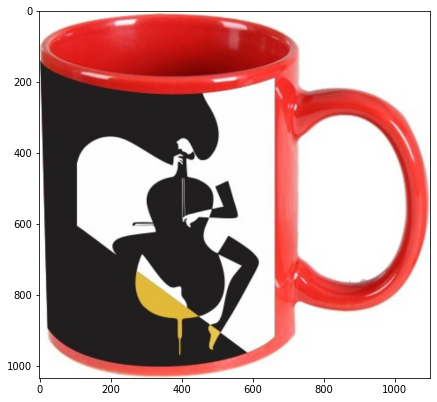

In [ ]:
eval(177)